# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

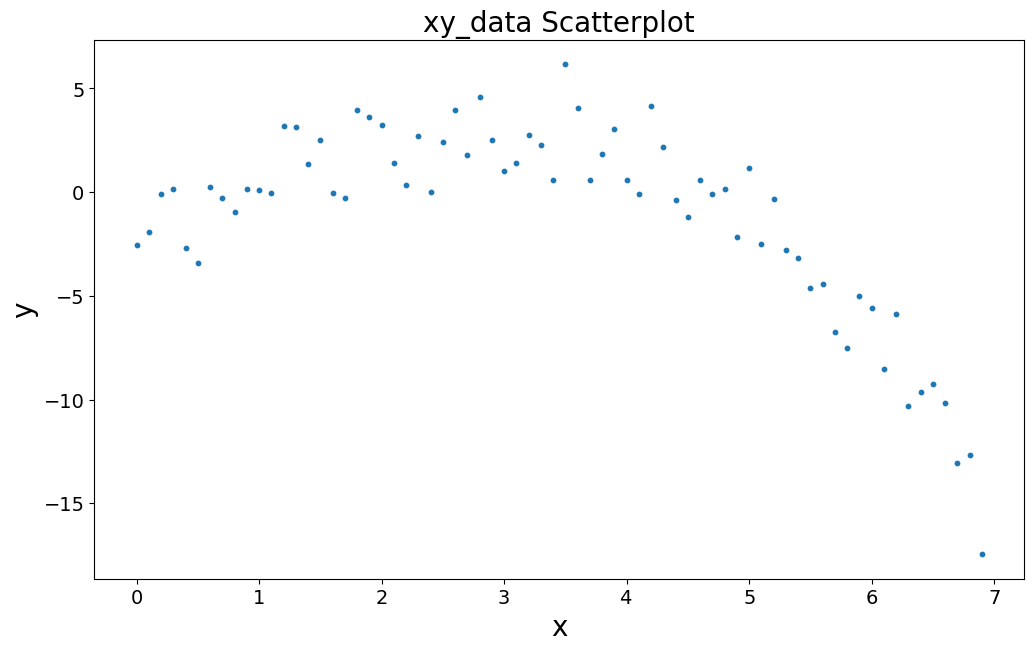

In [9]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

x = xy_data[:, 0]
y = xy_data[:, 1]

plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('xy_data Scatterplot')

plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [21]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    
    if np.shape(data_matrix)[0] <= k:
        k = np.shape(data_matrix)[0] - 1

    x = data_matrix[:, 0]
    y = data_matrix[:,1]
    X = np.ones((len(x), 1))
    i = 0

    while i < k:
        X_new = np.column_stack((X, x**(i+1)))
        X = X_new
        i+=1

    XT = X.T
    beta_k = np.linalg.inv(XT.dot(X)).dot(XT.dot(y))
    
    fit = X.dot(beta_k)
    res_vec = y - fit
    return beta_k, fit, res_vec


Use the tests below to check the outputs of the function you have written:

In [22]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

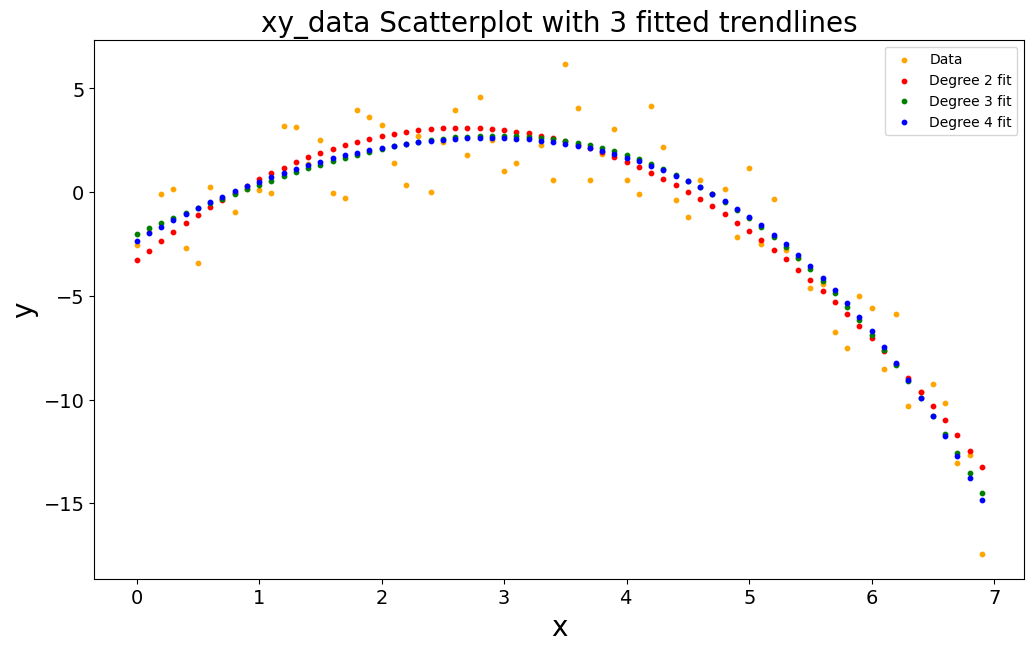

For k = 2, SSE = 172.1810252898855 R^2 = 0.8876297774918224 ; for k = 3, SSE = 152.4058048891581 R^2 = 0.9005356474205022 ; for k = 4, SSE =  151.22778969027118 R^2 =  0.9013044535638857


In [37]:
#Your code here
x = xy_data[:, 0]
y = xy_data[:, 1]

plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(x, y, label = 'Data', color = 'orange', s=10)

plt.scatter(x, polyreg(xy_data, 2)[1], label="Degree 2 fit", color='red', s = 10)
plt.scatter(x, polyreg(xy_data, 3)[1], label="Degree 3 fit", color='green', s = 10)
plt.scatter(x, polyreg(xy_data, 4)[1], label="Degree 4 fit", color='blue', s = 10)

plt.xlabel('x')
plt.ylabel('y')
plt.title('xy_data Scatterplot with 3 fitted trendlines')
plt.legend()

plt.show()

a = 0
i = 0
while i < len(x):
    a+=polyreg(xy_data, 0)[2][i]**2
    i+=1
Degree_0_SSE = a

a = 0
i = 0
while i < len(x):
    a+=polyreg(xy_data, 2)[2][i]**2
    i+=1
Degree_2_SSE = a

a = 0
i = 0
while i < len(x):
    a+=polyreg(xy_data, 3)[2][i]**2
    i+=1
Degree_3_SSE = a

a = 0
i = 0
while i < len(x):
    a+=polyreg(xy_data, 4)[2][i]**2
    i+=1
Degree_4_SSE = a

R_sq_2 = 1- Degree_2_SSE / Degree_0_SSE
R_sq_3 = 1- Degree_3_SSE / Degree_0_SSE
R_sq_4 = 1- Degree_4_SSE / Degree_0_SSE

print('For k = 2, SSE =', Degree_2_SSE, 'R^2 =', R_sq_2, '; for k = 3, SSE =', Degree_3_SSE, 'R^2 =', R_sq_3, '; for k = 4, SSE = ', Degree_4_SSE, 'R^2 = ', R_sq_4)

 #### State which model you choose and briefly justify your choice.
 
 
k = 4 has the best fit. This is mathematically necessary, as it subsumes smaller values of k. It is also demonstrated by having the lowest SSE and greatest R^2 value, demonstrating its better adherence to the data trend. However, it is much more computationally intensive to use, so for very large datasets or in contexts where it is necessary to reduce expended compute, it would be necessary to select a lower k value.
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

Mean of residuals =  -0.0 Variance of residuals =  2.16


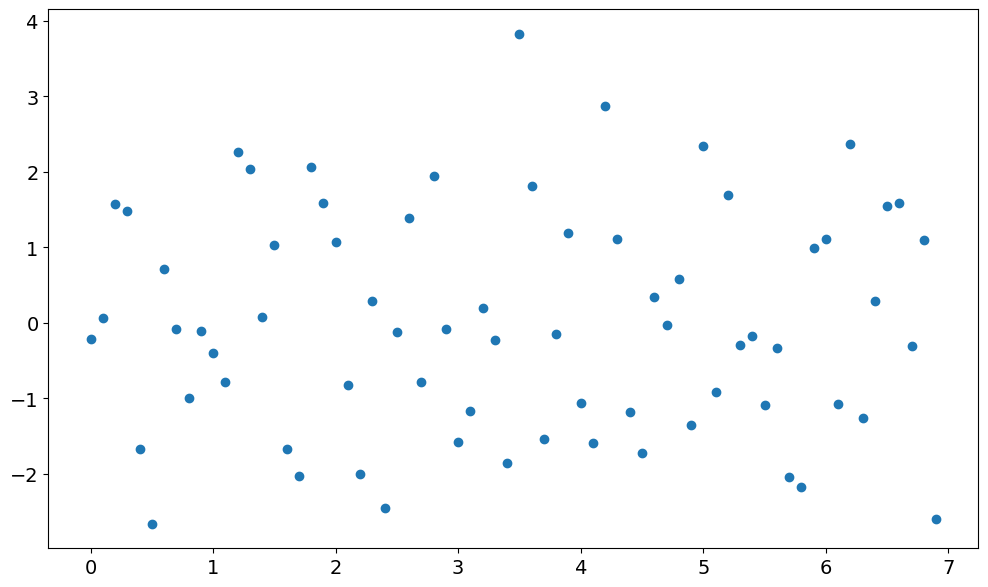

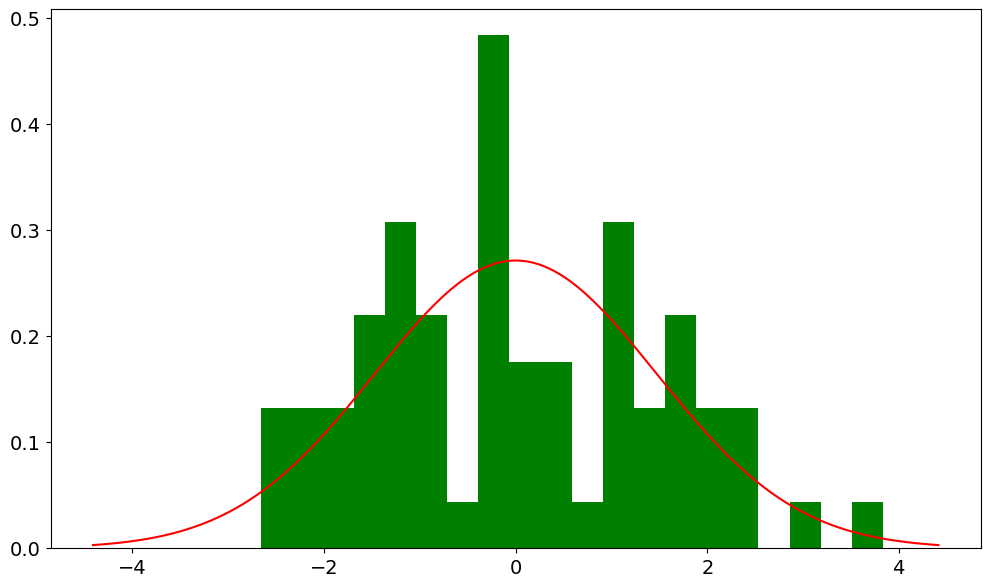

In [43]:
#Your code here
plt.figure()
plt.scatter(x,polyreg(xy_data, 4)[2])

plt.figure()
print('Mean of residuals = ', np.round(np.mean(polyreg(xy_data, 4)[2]), 5), 'Variance of residuals = ', 
      np.round(np.var(polyreg(xy_data, 4)[2]), 3))

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(polyreg(xy_data, 4)[2], bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
from scipy.stats import norm
res_stdev = np.std(polyreg(xy_data, 4)[2])  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)

plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()

